## Instalación de paquetes

In [1]:
if("tidyverse" %in% rownames(installed.packages()) == FALSE) {install.packages("tidyverse")}
if("corrplot" %in% rownames(installed.packages()) == FALSE) {install.packages("corrplot")}

# Conjunto de Datos

## Datos

In [2]:
library("tidyverse")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
# Cargamos datos desde la pagina de la secretaria de salud
temp <- tempfile()
download.file(
    #"datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip",
    #"http://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/historicos/2021/01/datos_abiertos_covid19_19.01.2021.zip",
    #"datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/historicos/2021/01/datos_abiertos_covid19_10.01.2021.zip",
    "datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/historicos/2021/02/datos_abiertos_covid19_21.02.2021.zip",
    
    #
    # En ninguno de los conjuntos anteriores obtengo registros de 
    # pacientes con un resultado positivo de sexo mujer y que 
    # solo opciones SI o NO en las variables de interes
    #
    
    temp
)
all_data <- read.csv(unz(temp, "210221COVID19MEXICO.csv"))
unlink(temp)

In [4]:
data <- all_data %>% 
    # Pacientes de la ciudad de mexico con un resultado positivo
    filter( ENTIDAD_RES == 9 & CLASIFICACION_FINAL <= 3) %>% 
    # Registros que especifican correctamente lo que nos interesa
    filter( 
        SEXO <= 2 & NEUMONIA <= 2 & OTRA_COM <= 2 & DIABETES <= 2 & 
        EPOC <= 2 & ASMA <= 2 & INMUSUPR <= 2 & HIPERTENSION <= 2 &
        CARDIOVASCULAR <= 2 & OBESIDAD <= 2 & RENAL_CRONICA <= 2 & 
        TABAQUISMO <= 2 & INTUBADO <= 2
    ) %>%
    # Seleccionamos variables "fisicas" del paciente y la variable INTUBADO
    select(
        SEXO, EDAD, NEUMONIA, OTRA_COM, DIABETES, EPOC, ASMA, INMUSUPR, 
        HIPERTENSION, CARDIOVASCULAR, OBESIDAD, RENAL_CRONICA, TABAQUISMO, 
        INTUBADO
    )
# Psamos a tipo entero
data$SEXO <- as.integer(data$SEXO)
data$EDAD <- as.integer(data$EDAD)
data$NEUMONIA <- as.integer(data$NEUMONIA)
data$OTRA_COM <- as.integer(data$OTRA_COM)
data$DIABETES <- as.integer(data$DIABETES)
data$EPOC <- as.integer(data$EPOC)
data$ASMA <- as.integer(data$ASMA)
data$INMUSUPR <- as.integer(data$INMUSUPR)
data$HIPERTENSION <- as.integer(data$HIPERTENSION)
data$CARDIOVASCULAR <- as.integer(data$CARDIOVASCULAR)
data$OBESIDAD <- as.integer(data$OBESIDAD)
data$RENAL_CRONICA <- as.integer(data$RENAL_CRONICA)
data$TABAQUISMO <- as.integer(data$TABAQUISMO)
data$INTUBADO <- as.integer(data$INTUBADO)

In [5]:
nrow(all_data)
"Numero de registros a usar en el analisis"
nrow(data)
"Cantidad de INTUBADOS / NO INTUBADOS"
table(data$INTUBADO)
"Porcentaje de INTUBADOS / NO INTUBADOS"
table(data$INTUBADO) / nrow(data)

[1] 5277696

[1] "Numero de registros a usar en el analisis"

[1] 55423

[1] "Cantidad de INTUBADOS / NO INTUBADOS"


    1     2 
 9307 46116 

[1] "Porcentaje de INTUBADOS / NO INTUBADOS"


        1         2 
0.1679267 0.8320733 

In [6]:
"SEXO"
table(data$SEXO)
"EDAD"
table(data$EDAD)
"NEUMONIA"
table(data$NEUMONIA)
"EMBARAZO"
table(data$OTRA_COM)
"DIABETES"
table(data$DIABETES)
"EPOC"
table(data$EPOC)
"ASMA"
table(data$ASMA)
"INMUSUPR"
table(data$INMUSUPR)
"HIPERTENSION"
table(data$HIPERTENSION)
"CARDIOVASCULAR"
table(data$CARDIOVASCULAR)
"OBESIDAD"
table(data$OBESIDAD)
"RENAL_CRONICA"
table(data$RENAL_CRONICA)
"TABAQUISMO"
table(data$TABAQUISMO)

[1] "SEXO"


    1     2 
21930 33493 

[1] "EDAD"


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
 131   51   34   30   14   22    9   18   18   17   20   21   26   34   34   31 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
  46   43   57   48   56   66   94  121  129  158  204  242  270  288  329  349 
  32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47 
 366  385  415  499  470  531  545  590  621  645  708  726  810  850 1004 1005 
  48   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63 
1104 1073 1148 1104 1258 1164 1244 1285 1342 1350 1338 1445 1473 1411 1398 1396 
  64   65   66   67   68   69   70   71   72   73   74   75   76   77   78   79 
1309 1346 1331 1296 1238 1259 1195 1072 1107  979  930  934  844  808  728  671 
  80   81   82   83   84   85   86   87   88   89   90   91   92   93   94   95 
 660  560  494  445  419  387  343  268  268  180  193  131   80   54   55   41 
  96   97   98   99  100  1

[1] "NEUMONIA"


    1     2 
37872 17551 

[1] "EMBARAZO"


    1     2 
 2454 52969 

[1] "DIABETES"


    1     2 
15849 39574 

[1] "EPOC"


    1     2 
 1767 53656 

[1] "ASMA"


    1     2 
  962 54461 

[1] "INMUSUPR"


    1     2 
 1161 54262 

[1] "HIPERTENSION"


    1     2 
18447 36976 

[1] "CARDIOVASCULAR"


    1     2 
 2248 53175 

[1] "OBESIDAD"


    1     2 
11227 44196 

[1] "RENAL_CRONICA"


    1     2 
 2434 52989 

[1] "TABAQUISMO"


    1     2 
 5349 50074 

## Análisis exploratorio de datos

### Vector de Medias y Matriz de Correlación

In [7]:
# Division por clases
class_1 <- data %>% filter(INTUBADO == "1") %>% select(-INTUBADO)
class_2 <- data %>% filter(INTUBADO == "2") %>% select(-INTUBADO)
# Calculo de medias muestrales
mean_1 <- as.vector(colMeans(class_1))
mean_2 <- as.vector(colMeans(class_2))

colnames(data)

t(mean_1)
t(mean_2)

[1] "SEXO"           "EDAD"           "NEUMONIA"       "OTRA_COM"      
 [5] "DIABETES"       "EPOC"           "ASMA"           "INMUSUPR"      
 [9] "HIPERTENSION"   "CARDIOVASCULAR" "OBESIDAD"       "RENAL_CRONICA" 
[13] "TABAQUISMO"     "INTUBADO"

1.663372,60.22918,1.130439,1.957881,1.66133,1.963253,1.985602,1.975717,1.619963,1.956162,1.748254,1.952939,1.886644


1.592397,57.91701,1.354259,1.955287,1.724673,1.9691,1.982045,1.979725,1.676685,1.960101,1.807355,1.956718,1.906887


Podemos notar que algunas variables tienen un coeficiente de correlación con la variable de respuesta `INTUBADO`, estas son SEXO, EDAD, NEUMONIA, DIABETES, HIPERTENSION y OBESIDAD.

corrplot 0.88 loaded



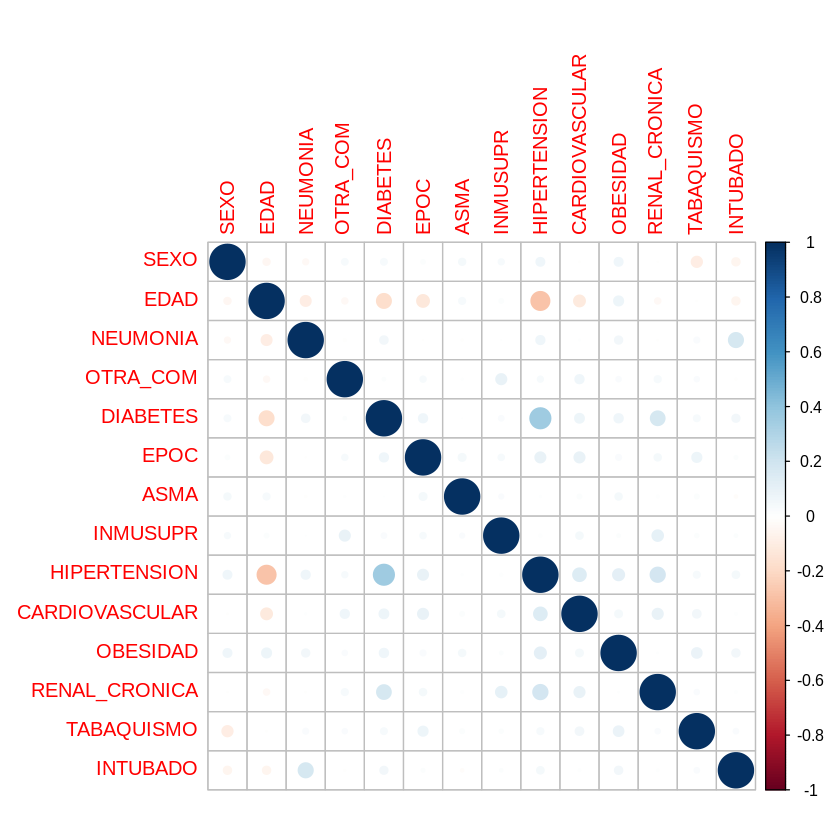

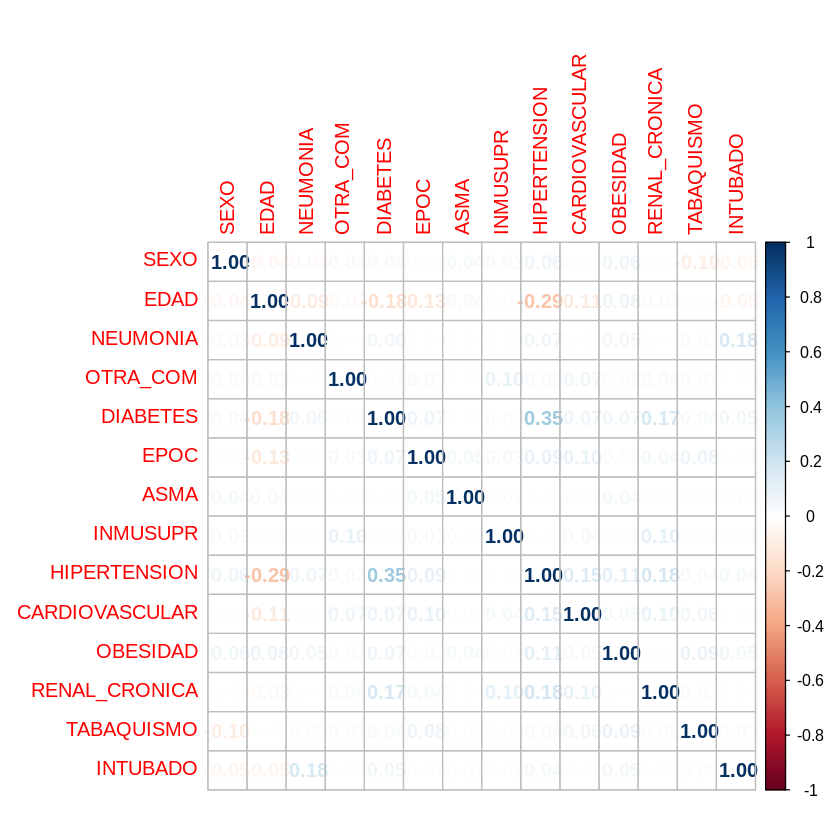

In [8]:
library("corrplot")
cor_matrix <- cor(data)
corrplot(cor_matrix)
corrplot(cor_matrix, method = "number")

### Análisis de Componentes Principales

No hay información relevante

Importance of components:
                          Comp.1     Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     1.3453633 1.09075757 1.06517263 1.04624469 1.02392637
Proportion of Variance 0.1392309 0.09151939 0.08727636 0.08420215 0.08064809
Cumulative Proportion  0.1392309 0.23075034 0.31802670 0.40222885 0.48287694
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     1.00352552 0.98246702 0.95318455 0.94476311 0.91240530
Proportion of Variance 0.07746642 0.07424934 0.06988929 0.06865979 0.06403719
Cumulative Proportion  0.56034337 0.63459271 0.70448200 0.77314179 0.83717898
                          Comp.11    Comp.12    Comp.13
Standard deviation     0.90006397 0.84406893 0.77078254
Proportion of Variance 0.06231655 0.05480403 0.04570044
Cumulative Proportion  0.89949553 0.95429956 1.00000000


Loadings:
               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
SEXO                          0.552  0.468  0.211  0.122  0.126  0.193  0.115
EDAD           -0.395  0.394         0.155 -0.328 -0.172                     
NEUMONIA        0.131 -0.178 -0.315  0.167 -0.139  0.607 -0.518         0.193
OTRA_COM        0.113  0.368  0.229 -0.227  0.106  0.519  0.205 -0.220 -0.561
DIABETES        0.472 -0.150         0.119 -0.257 -0.149               -0.230
EPOC            0.245  0.160 -0.129 -0.110  0.581 -0.120         0.476  0.166
ASMA                   0.329         0.334  0.295 -0.325 -0.603 -0.349 -0.284
INMUSUPR        0.100  0.453  0.281 -0.254 -0.216  0.215 -0.331  0.347  0.276
HIPERTENSION    0.545 -0.160         0.126                             -0.108
CARDIOVASCULAR  0.294  0.205        -0.207  0.211         0.221 -0.606  0.540
OBESIDAD        0.140  0.346 -0.225  0.598 -0.170  0.136  0.320         0.162
RENAL_CRONICA   0.309  0.171  0.166 -0.223 -0.444 -0.

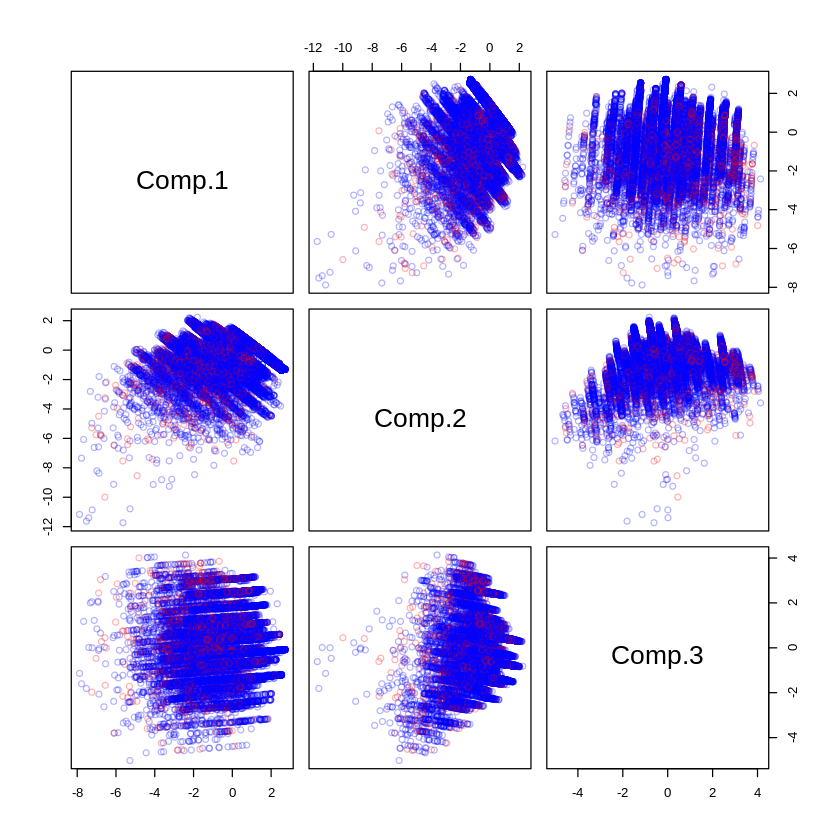

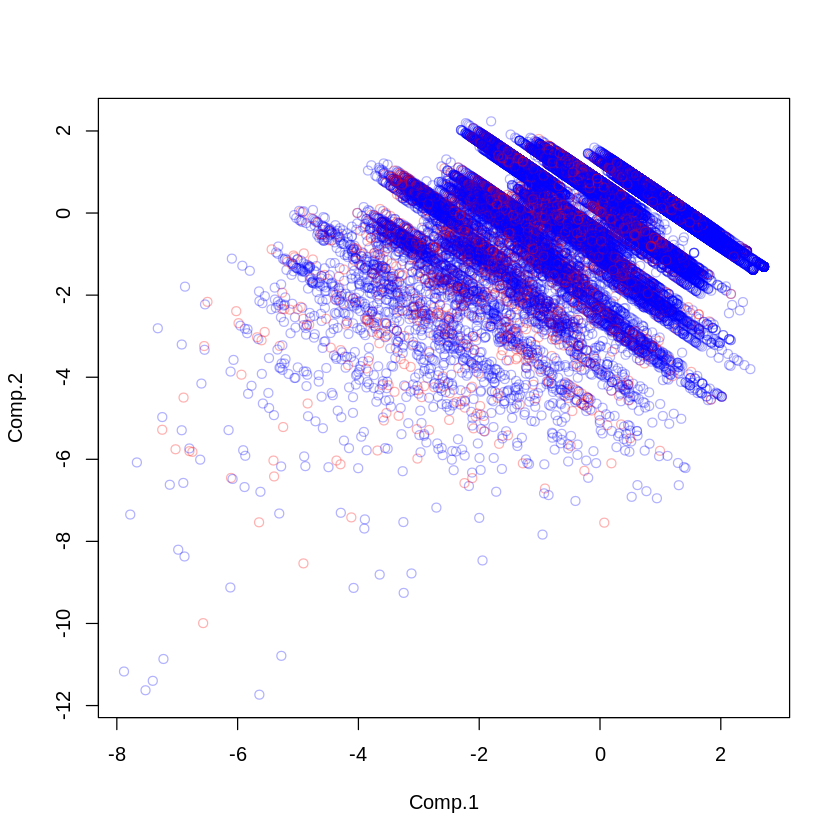

In [9]:
pca <- princomp(select(data, -INTUBADO), cor=TRUE)

summary(pca)
pca$loadings

pca_data <- as.data.frame(pca$scores)
pca_data$Y <- data$INTUBADO

pairs(
    select(pca_data, Comp.1, Comp.2, Comp.3), 
    col = c(
        rgb(red = 1.0, green = 0.0, blue = 0.0, alpha = 0.3),
        rgb(red = 0.0, green = 0.0, blue = 1.0, alpha = 0.3)
    )[data$INTUBADO]
)

plot(
    select(pca_data, Comp.1, Comp.2), 
    col = c(
        rgb(red = 1.0, green = 0.0, blue = 0.0, alpha = 0.3),
        rgb(red = 0.0, green = 0.0, blue = 1.0, alpha = 0.3)
    )[data$INTUBADO]
)

# Regresión Logística

## Ajuste de modelos

In [10]:
data$INTUBADO <- as.integer(data$INTUBADO - 1)
data$NO_INTUBADO <- as.integer((-1*data$INTUBADO) + 1)

table(data$INTUBADO)
table(data$NO_INTUBADO)


    0     1 
 9307 46116 


    0     1 
46116  9307 

Al ajustar un modelo $M1$ usando todas las variables de interés y compararlo con el modelo saturado obtenemos una desviación residual de $35804$ con $55409$ grados de libertad. $35804$ está muy por debajo de $55409$, es decir, el modelo se ajusta bien a los datos, sin embargo, podemos ver que el modelo más simple tiene una desviació de $50167$ en $55422$ grados de libertad, con una probabilidad de 1. 

Lo anterior nos indica que es buena idea usar el modelo nulo en lugar de el modelo que usa las variables que hemos seleccionado, es decir, las variables que estamos usando no tienen una relación causal significativa con la variable de `INTUBADO`.

In [11]:
set.seed(1234)
fit <- glm(
    cbind(INTUBADO, NO_INTUBADO) ~ 
    SEXO + EDAD + NEUMONIA + OTRA_COM + DIABETES + EPOC + ASMA + INMUSUPR + 
    HIPERTENSION + CARDIOVASCULAR + OBESIDAD + RENAL_CRONICA + TABAQUISMO, 
    family=binomial(link = logit),
    data=data
)
summary(fit)
# Guardamos la desviación residual
rd1 <- fit$deviance # 2(LL(Saturated Model) - LL(Proposed Model))
df1 <- fit$df.residual # df_Sat - df_Proposed
"Residual deviance"
rd1
"Degrees of Freedom"
df1
"Prob"
1-pchisq(50167, 55422)


Call:
glm(formula = cbind(INTUBADO, NO_INTUBADO) ~ SEXO + EDAD + NEUMONIA + 
    OTRA_COM + DIABETES + EPOC + ASMA + INMUSUPR + HIPERTENSION + 
    CARDIOVASCULAR + OBESIDAD + RENAL_CRONICA + TABAQUISMO, family = binomial(link = logit), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6519   0.3454   0.5745   0.6888   1.0433  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     0.0055729  0.3191683   0.017  0.98607    
SEXO           -0.3237148  0.0247278 -13.091  < 2e-16 ***
EDAD           -0.0072453  0.0008221  -8.813  < 2e-16 ***
NEUMONIA        1.2452655  0.0324506  38.374  < 2e-16 ***
OTRA_COM       -0.0806436  0.0581428  -1.387  0.16544    
DIABETES        0.1837955  0.0266360   6.900 5.19e-12 ***
EPOC            0.0678633  0.0639556   1.061  0.28864    
ASMA           -0.1850525  0.0959965  -1.928  0.05389 .  
INMUSUPR        0.2256336  0.0779178   2.896  0.00378 ** 
HIPERTENSION    0.0620770  0.026919

[1] "Residual deviance"

[1] 47639.43

[1] "Degrees of Freedom"

[1] 55409

[1] "Prob"

[1] 1

# Conclusiones

A pesar de que el modelo con las vaariables que seleccionamos se ajusta bien a los datos, podemos ver que el modelo nulo también se ajusta bien, esto nos dice que basta usar el modelo nulo para estos datos, por lo que concluimos que las variables elegidas no tienen relación causal con el hecho de que un paciente sea intubado o no.